<a href="https://colab.research.google.com/github/SathishKumar359/emoji-prediction/blob/main/text_to_emoji_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def read_file(file_name):
    data_list  = []
    with open(file_name, 'r') as f:
        for line in f:
            line = line.strip()
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data_list.append([label, text])
    return data_list

In [ ]:
file_name = "/content/sample_data/Dataset/psychExp.txt"
psychExp_txt = read_file(file_name)

In [ ]:
print("The number of instances: {}".format(len(psychExp_txt)))

The number of instances: 7480


In [ ]:
print("Data example: ")
print(psychExp_txt[0])

Data example: 
['1. 0. 0. 0. 0. 0. 0.', 'During the period of falling in love, each time that we met and especially when we had not met for a long time.']


In [ ]:
import re
from collections import Counter

In [ ]:
def ngram(token, n):
    output = []
    for i in range(n-1, len(token)):
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram)
    return output

In [ ]:
def create_feature(text, nrange=(1, 1)):
    text_features = []
    text = text.lower()

    # 1. treat alphanumeric characters as word tokens
    # Since tweets contain #, we keep it as a feature
    # Then, extract all ngram lengths
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1):
        text_features += ngram(text_alphanum.split(), n)

    # 2. treat punctuations as word token
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)

    # 3. Return a dictinaory whose keys are the list of elements
    # and their values are the number of times appearede in the list.
    return Counter(text_features)

In [ ]:
print(create_feature("I love you!"))
print(create_feature(" aly wins the gold!!!!!!  #olympics"))
print(create_feature(" aly wins the gold!!!!!!  #olympics", (1, 2)))

Counter({'i': 1, 'love': 1, 'you': 1, '!': 1})
Counter({'aly': 1, 'wins': 1, 'the': 1, 'gold': 1, '#olympics': 1, '!!!!!!': 1, '#': 1})
Counter({'aly': 1, 'wins': 1, 'the': 1, 'gold': 1, '#olympics': 1, 'aly wins': 1, 'wins the': 1, 'the gold': 1, 'gold #olympics': 1, '!!!!!!': 1, '#': 1})


In [ ]:
def convert_label(item, name):
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)):
        if items[idx] == 1:
            label += name[idx] + " "

    return label.strip()

In [ ]:
emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
X_all = []
y_all = []
for label, text in psychExp_txt:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

In [ ]:
print("features example: ")
print(X_all[0])

features example: 
Counter({'time': 2, 'we': 2, 'met': 2, 'during': 1, 'the': 1, 'period': 1, 'of': 1, 'falling': 1, 'in': 1, 'love': 1, 'each': 1, 'that': 1, 'and': 1, 'especially': 1, 'when': 1, 'had': 1, 'not': 1, 'for': 1, 'a': 1, 'long': 1, 'during the': 1, 'the period': 1, 'period of': 1, 'of falling': 1, 'falling in': 1, 'in love': 1, 'love each': 1, 'each time': 1, 'time that': 1, 'that we': 1, 'we met': 1, 'met and': 1, 'and especially': 1, 'especially when': 1, 'when we': 1, 'we had': 1, 'had not': 1, 'not met': 1, 'met for': 1, 'for a': 1, 'a long': 1, 'long time': 1, 'during the period': 1, 'the period of': 1, 'period of falling': 1, 'of falling in': 1, 'falling in love': 1, 'in love each': 1, 'love each time': 1, 'each time that': 1, 'time that we': 1, 'that we met': 1, 'we met and': 1, 'met and especially': 1, 'and especially when': 1, 'especially when we': 1, 'when we had': 1, 'we had not': 1, 'had not met': 1, 'not met for': 1, 'met for a': 1, 'for a long': 1, 'a long t

In [ ]:
print("Label example:")
print(y_all[0])

Label example:
joy


In [ ]:
!python -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!python -m pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X_all, y_all, test_size = 0.2, random_state = 123)

In [ ]:
from sklearn.metrics import accuracy_score

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

#     print("Training acc: {}".format(train_acc))
#     print("Test acc    : {}".format(test_acc))

    return train_acc, test_acc

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Classifiers
svc = SVC()
lsvc = LinearSVC(random_state=123)
rforest = RandomForestClassifier(random_state=123)
dtree = DecisionTreeClassifier()
clifs = [svc, lsvc, rforest, dtree]
# train and test them
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs:
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

| Classifier                | Training Accuracy | Test Accuracy |
| ------------------------- | ----------------- | ------------- |
| SVC                       |         0.9067513 |     0.4512032 |


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


| LinearSVC                 |         0.9988302 |     0.5768717 |
| RandomForestClassifier    |         0.9988302 |     0.5541444 |
| DecisionTreeClassifier    |         0.9988302 |     0.4565508 |


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:


parameters = {'C':[1, 2, 3, 5, 10, 15, 20, 30, 50, 70, 100],
             'tol':[0.1, 0.01, 0.001, 0.0001, 0.00001]}

lsvc = LinearSVC(random_state=123)
grid_obj = GridSearchCV(lsvc, param_grid = parameters, cv=5)
grid_obj.fit(X_train, y_train)

print("Validation acc: {}".format(grid_obj.best_score_))
print("Training acc: {}".format(accuracy_score(y_train, grid_obj.predict(X_train))))
print("Test acc    : {}".format(accuracy_score(y_test, grid_obj.predict(X_test))))
print("Best parameter: {}".format(grid_obj.best_params_))

In [ ]:
%matplotlib inline

In [ ]:
import seaborn as sn

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
sklearn.model_selection.GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, grid_obj.predict(X_test))
print(matrix)

[[112  27  16  23  12  19  19]
 [ 20 113  11  11  12  17   9]
 [  9  18 157   3  11  16  10]
 [ 19  12  15 107  12  17  36]
 [  7   9   7   7 155  18   8]
 [ 17   9  16  13  21 137  10]
 [ 31  19  10  30  17  10  82]]


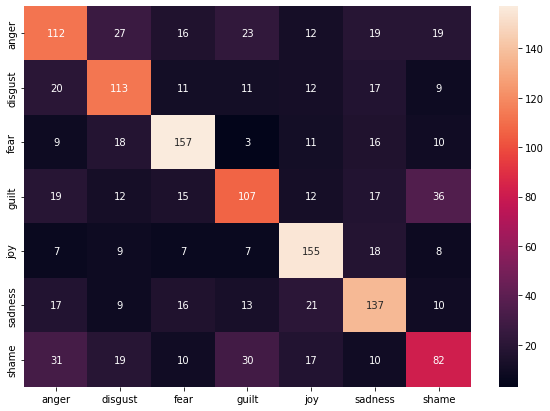

In [ ]:
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
df_cm = pd.DataFrame(matrix, index = l, columns = l)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")
plt.show()

In [ ]:
# Get counts for each label
label_freq = {}
for label, _ in psychExp_txt:
    label_freq[label] = label_freq.get(label, 0) + 1

# print the labels and their counts in sorted order
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))

joy       (1. 0. 0. 0. 0. 0. 0.)  1084
anger     (0. 0. 1. 0. 0. 0. 0.)  1080
sadness   (0. 0. 0. 1. 0. 0. 0.)  1079
fear      (0. 1. 0. 0. 0. 0. 0.)  1078
disgust   (0. 0. 0. 0. 1. 0. 0.)  1057
guilt     (0. 0. 0. 0. 0. 0. 1.)  1057
shame     (0. 0. 0. 0. 0. 1. 0.)  1045


In [ ]:
!pip install emoji==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 5.0 MB/s 


In [ ]:
import emoji

In [ ]:
emoji.EMOJI_UNICODE['en']

{':1st_place_medal:': '🥇',
 ':2nd_place_medal:': '🥈',
 ':3rd_place_medal:': '🥉',
 ':AB_button_(blood_type):': '🆎',
 ':ATM_sign:': '🏧',
 ':A_button_(blood_type):': '🅰',
 ':A_button_(blood_type)_selector:': '🅰️',
 ':Afghanistan:': '🇦🇫',
 ':Aland_Islands:': '🇦🇽',
 ':Albania:': '🇦🇱',
 ':Algeria:': '🇩🇿',
 ':American_Samoa:': '🇦🇸',
 ':Andorra:': '🇦🇩',
 ':Angola:': '🇦🇴',
 ':Anguilla:': '🇦🇮',
 ':Antarctica:': '🇦🇶',
 ':Antigua_&_Barbuda:': '🇦🇬',
 ':Aquarius:': '♒',
 ':Argentina:': '🇦🇷',
 ':Aries:': '♈',
 ':Armenia:': '🇦🇲',
 ':Aruba:': '🇦🇼',
 ':Ascension_Island:': '🇦🇨',
 ':Australia:': '🇦🇺',
 ':Austria:': '🇦🇹',
 ':Azerbaijan:': '🇦🇿',
 ':BACK_arrow:': '🔙',
 ':B_button_(blood_type):': '🅱',
 ':B_button_(blood_type)_selector:': '🅱️',
 ':Bahamas:': '🇧🇸',
 ':Bahrain:': '🇧🇭',
 ':Bangladesh:': '🇧🇩',
 ':Barbados:': '🇧🇧',
 ':Belarus:': '🇧🇾',
 ':Belgium:': '🇧🇪',
 ':Belize:': '🇧🇿',
 ':Benin:': '🇧🇯',
 ':Bermuda:': '🇧🇲',
 ':Bhutan:': '🇧🇹',
 ':Bolivia:': '🇧🇴',
 ':Bosnia_&_Herzegovina:': '🇧🇦',
 ':Botswana:': '🇧

In [ ]:
emoji_dict = {"joy":"😂", "fear":"😱", "anger":"😠", "sadness":"😢", "disgust":"😒", "shame":"😳", "guilt":"😳"}

In [ ]:
t1 = "Thank you for dinner!"
t2 = "I don't like it"
t3 = "My car skidded on the wet street"
t4 = "i Am anger on you"

texts = [t1, t2, t3, t4]
for text in texts:
    features = create_feature(text, nrange=(1, 5))
    features = vectorizer.transform(features)
    prediction = grid_obj.predict(features)[0]
    print("{} {}".format(emoji_dict[prediction], text))

😂 Thank you for dinner!
😢 I don't like it
😱 My car skidded on the wet street
😠 i Am anger on you
